In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

# load dataset
wd = '/Users/ewenwang/Documents/practice_data/'
file = 'credit_card.csv'
data = pd.read_csv(wd+file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0)

target = 'Class'
features = [x for x in data.columns if x not in [target]]

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

import numpy as np
np.random.seed(0)

In [6]:
from sklearn.model_selection import GridSearchCV

In [4]:
y = train[target]
X = train[features]
n_features = len(features)

In [32]:
def basic_model():
    model = Sequential()
    model.add(Dense(16, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=basic_model, epochs=1, verbose=0)

In [33]:
batch_size = range(5, 31, 5)
param_grid = dict(batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, y)

In [3]:
batch_size = range(5, 31, 5)
param_grid = dict(batch_size=batch_size)

In [4]:
[*param_grid][0]

'batch_size'

best parameters: 5
best score:      0.99828 (+/-0.00009)


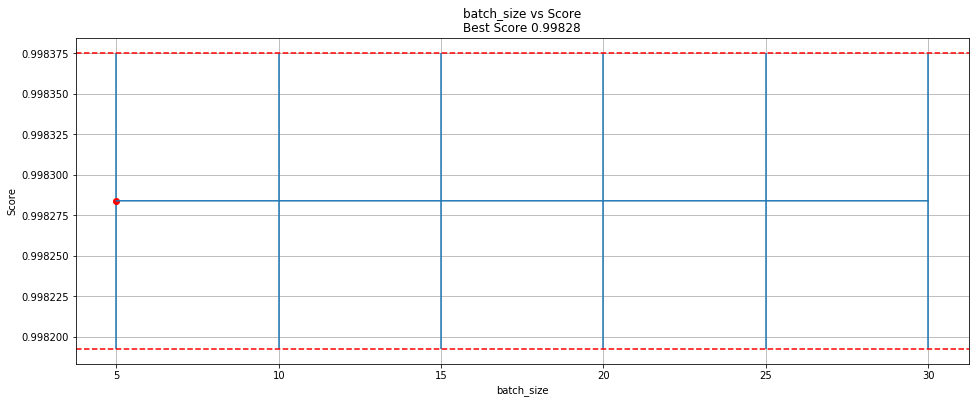

In [34]:
GridLine(grid_result, 'batch_size')

In [7]:
import matplotlib.pyplot as plt

In [26]:
def GridLine(grid_result, param_name, negative=False):

    cv_results = grid_result.cv_results_
    ticks = [*param_grid.values()][0]
    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    
    best_param = best_row['param_' + param_name]
    best_mean = -best_row['mean_test_score'] if negative else best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    
    print("best parameters: {}".format(best_param))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(best_mean, best_stdev))
    
    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)
    
    params = scores_df['param_' + param_name]
    means = -scores_df['mean_test_score'] if negative else scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    
    # plot
    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.errorbar(params, means, yerr=stds)

    plt.axhline(y=best_mean + best_stdev, color='red', ls='--')
    plt.axhline(y=best_mean - best_stdev, color='red', ls='--')
    plt.plot(best_param, best_mean, 'or')

    plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(best_mean))
    plt.xlabel(param_name)
    plt.ylabel('Score')
    ax.set_xticks(ticks)
    plt.grid()
    plt.show()

In [31]:
grid_result.cv_results_

{'mean_fit_time': array([434.26202567, 229.41074856, 165.4215587 , 127.04890458,
        103.64449183,  79.72535229]),
 'mean_score_time': array([10.98100003,  5.06987874,  3.57340964,  2.70864741,  2.25058055,
         1.93683203]),
 'mean_test_score': array([0.99828392, 0.99828392, 0.99828392, 0.99828392, 0.99828392,
        0.99828392]),
 'mean_train_score': array([0.99828392, 0.99828392, 0.99828392, 0.99828392, 0.99828392,
        0.99828392]),
 'param_batch_size': masked_array(data=[5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 5},
  {'batch_size': 10},
  {'batch_size': 15},
  {'batch_size': 20},
  {'batch_size': 25},
  {'batch_size': 30}],
 'rank_test_score': array([1, 3, 1, 4, 5, 6], dtype=int32),
 'split0_test_score': array([0.99836733, 0.99836733, 0.99836733, 0.99836733, 0.99836732,
        0.99836732]),
 'split0_train_score': array([0.99824222, 0.99824222, 0

best parameters: 5
best score:      0.99828 (+/-0.00009)


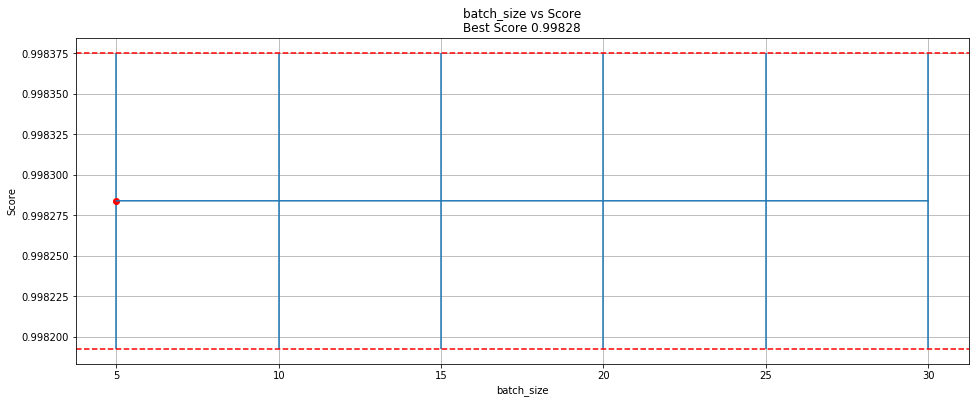

In [27]:
GridLine(grid_result, 'batch_size')

In [30]:
def basic_model():
    model = Sequential()
    model.add(Dense(16, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_epochs = KerasClassifier(build_fn=basic_model, batch_size=5, verbose=0)

epochs = range(2, 21, 2)
param_grid = dict(epochs=epochs)

grid = GridSearchCV(estimator=model_epochs, param_grid=param_grid)
grid_result = grid.fit(X, y)

KeyboardInterrupt: 

In [ ]:
GridLine(grid_result, 'epochs')